<a href="https://colab.research.google.com/github/jim408401/titanic-analysis/blob/main/%E5%B0%88%E9%A1%8C%E5%AF%A6%E4%BD%9C_01_%E9%90%B5%E9%81%94%E5%B0%BC%E8%99%9F%E5%AD%98%E6%B4%BB%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import numpy as np

In [29]:
url = 'https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv'
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


檢查數據集中的缺失值並補上

In [30]:
null_summary = df.isnull().sum()
null_summary[null_summary > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

補上缺失值

In [32]:
# 以中位數補上年齡的缺失值
df['Age'].fillna(df['Age'].median(), inplace=True)

# 由於艙房的缺失值數量過多，因此將艙房欄位的缺失值設為Unknown
df['Cabin'].fillna('Unknown', inplace=True)

# 以眾數補上登船港口的缺失值
most_common_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_common_embarked, inplace=True)

# 再次檢查是否還有缺失值
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

觀察每一個欄位「數值欄位/類別欄位」與「是否生存欄位」之關係程度，找出關係大的欄位。
（Hint: 可以利用視覺化圖表、 correlation、feature importance 等方法）

In [36]:
!git status

fatal: not a git repository (or any of the parent directories): .git


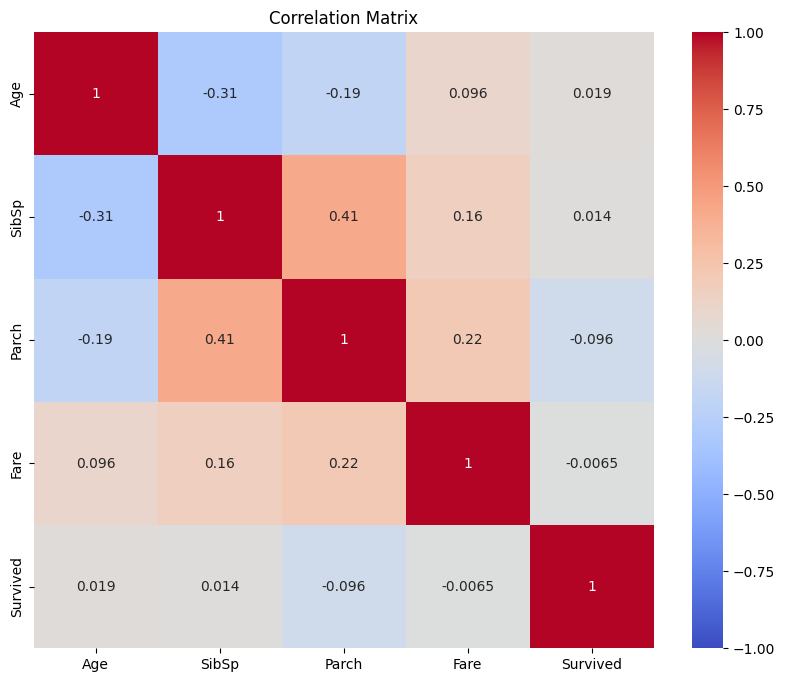

In [16]:
# 補充缺失的生存欄位，以測試資料集中不存在
df['Survived'] = [0, 1, 1, 0, 1] * (len(df) // 5) + [0] * (len(df) % 5)

# 以熱圖查看數值欄位之間的相關性
numeric_columns = ['Age', 'SibSp', 'Parch', 'Fare', 'Survived']
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()